In [1]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import numpy as np
from read import Nw ,Ww ,Nb ,Wb ,Nk ,Wk ,Wsum
from drawing_utility import draw_scater_line_with_quatients, get_cur_x_of_draw_scater_line,\
    whites_draw_color,browns_draw_color,blacks_draw_color,sum_draw_color,indipendent_sum_draw_color
import statistics_utility
from statistics_of_single_ball import ball_mass_avr_b,ball_mass_avr_k,ball_mass_avr_w
from drawing_utility import show_with_heatmap, show_3D_scatter_projection
from itertools import product
import scipy.special
import tqdm

In [2]:
indexes = \
    np.logical_not(np.isnan(Nw))*\
    np.logical_not(np.isnan(Ww))*\
    np.logical_not(np.isnan(Nb))*\
    np.logical_not(np.isnan(Wb))*\
    np.logical_not(np.isnan(Nk))*\
    np.logical_not(np.isnan(Wk))

Nw = Nw[indexes]
Ww = Ww[indexes]
Nb = Nb[indexes]
Wb = Wb[indexes]
Nk = Nk[indexes]
Wk = Wk[indexes]

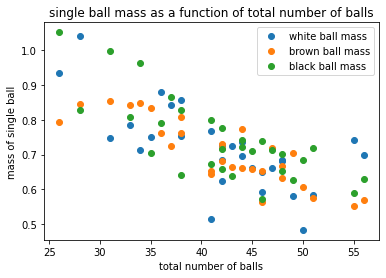

In [3]:
plt.title("single ball mass as a function of total number of balls")
plt.xlabel("total number of balls")
plt.ylabel("mass of single ball")
plt.plot(Nw+Nk+Nb,Ww/Nw,"o",label="white ball mass")
plt.plot(Nw+Nk+Nb,Wb/Nb,"o",label="brown ball mass")
plt.plot(Nw+Nk+Nb,Wk/Nk,"o",label="black ball mass")
plt.legend()

In [4]:
def get_expected_total_mass(Nw,Nb,Nk,b,Rw,Rb,Rk):
    N_vec = np.stack([Nw,Nb,Nk],axis=-1)
    R_vec = np.stack([Rw,Rb,Rk],axis=-1)
    return N_vec*((b - np.dot(N_vec,R_vec))[...,np.newaxis])
W_vec = np.stack([Ww,Wb,Wk],axis=-1)

In [5]:
a_arr = []
Rw_arr = []
Rb_arr = []
Rk_arr = []
total_difference_arr = []
Wp_arr = []

iter = tqdm.tqdm(product(
     1*np.linspace(0.8,1.2,11),
     0.5/55*np.linspace(0.8,1.2,11),
     0.5/55*np.linspace(0.8,1.2,11),
     0.5/55**np.linspace(0.8,1.2,11)
     ))

for a,Rw,Rb,Rk in iter:
     a_arr.append(a)
     Rw_arr.append(Rw)
     Rb_arr.append(Rb)
     Rk_arr.append(Rk)
     Wp = get_expected_total_mass(Nw,Nb,Nk,a,Rw,Rb,Rk)
     total_difference_arr.append(np.sum(np.abs(Wp - W_vec)))
     Wp_arr.append(Wp)

0it [00:00, ?it/s]

14641it [00:01, 12050.24it/s]


In [6]:
model_args = 1.17,0.0107625,0.0107625,0.0107625

(1.17, 0.0107625, 0.0107625, 0.0107625)


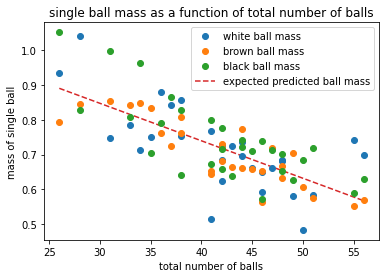

In [7]:
def get_min_and_max(arr):
    return min(arr),max(arr)
def get_max_and_min(arr):
    return max(arr),min(arr)

Wp = get_expected_total_mass(Nw,Nb,Nk,*model_args)
print(model_args)
plt.plot(Nw+Nk+Nb,Ww/Nw,"o",label="white ball mass")
plt.plot(Nw+Nk+Nb,Wb/Nb,"o",label="brown ball mass")
plt.plot(Nw+Nk+Nb,Wk/Nk,"o",label="black ball mass")
plt.plot(get_min_and_max(Nw+Nk+Nb),get_max_and_min(Wp[:,0]/Nw),"--",label="expected predicted ball mass",zorder=0)
plt.title("single ball mass as a function of total number of balls")
plt.xlabel("total number of balls")
plt.ylabel("mass of single ball")
plt.legend()

(1.17, 0.0107625, 0.0107625, 0.0107625)


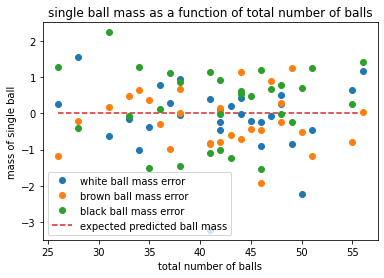

In [8]:
Wp = get_expected_total_mass(Nw,Nb,Nk,*model_args)
print(model_args)
plt.plot(Nw+Nk+Nb,Ww-Wp[:,0],"o",label="white ball mass error")
plt.plot(Nw+Nk+Nb,Wb-Wp[:,1],"o",label="brown ball mass error")
plt.plot(Nw+Nk+Nb,Wk-Wp[:,2],"o",label="black ball mass error")
plt.plot(get_min_and_max(Nw+Nk+Nb),get_max_and_min(Wp[:,0]-Wp[:,0]),"--",label="expected predicted ball mass",zorder=0)
plt.title("single ball mass as a function of total number of balls")
plt.xlabel("total number of balls")
plt.ylabel("mass of single ball")
plt.legend()

10201it [00:00, 11474.71it/s]


1.1704399999999997 0.0107625


Text(0, 0.5, 'R')

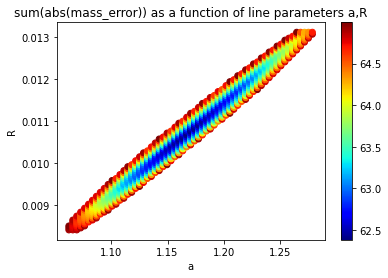

In [9]:
a_arr = []
R_arr = []
total_difference_arr = []
Wp_arr = []

iter = tqdm.tqdm(product(
     1.16*np.linspace(0.85,1.15,101),
     0.0105*np.linspace(0.8,1.25,101),
     ))

for a,Rv in iter:
     a_arr.append(a)
     R_arr.append(Rv)
     Wp = get_expected_total_mass(Nw,Nb,Nk,a,Rv,Rv,Rv)
     total_difference_arr.append(np.sum(np.abs(Wp - W_vec)))
     Wp_arr.append(Wp)

a_arr = np.array(a_arr)
R_arr = np.array(R_arr)
total_difference_arr = np.array(total_difference_arr)
Wp_arr = np.array(Wp_arr)

print(a_arr[np.argmin(total_difference_arr)],R_arr[np.argmin(total_difference_arr)])

indexes = total_difference_arr < 65

temp = plt.scatter(a_arr[indexes],R_arr[indexes],c=total_difference_arr[indexes],cmap="jet")
plt.colorbar(temp)
plt.title("sum(abs(mass_error)) as a function of line parameters a,R")
plt.xlabel("a")
plt.ylabel("R")

In [10]:
def probability_of_mass_vector_under_N_vector(Ww,Wb,Wk,Nw,Nb,Nk,std,a,R):
    Wp = get_expected_total_mass(Nw,Nb,Nk,a,R,R,R)
    W_vec = np.stack([Ww,Wb,Wk],axis=-1)
    d = (W_vec - Wp)/std
    return np.product(np.exp(-0.5*d**2)/(np.sqrt(2*np.pi)*std),axis=-1)

In [11]:
def get_pvalue_of_point(Ww,Wb,Wk,Nw,Nb,Nk,std,a,R):
    Wp = get_expected_total_mass(Nw,Nb,Nk,a,R,R,R)
    W_vec = np.stack([Ww,Wb,Wk],axis=-1)
    d = (W_vec - Wp)/(std*(2**0.5))
    return (1+scipy.special.erf(d))/2

Text(0.5, 0, 'std')

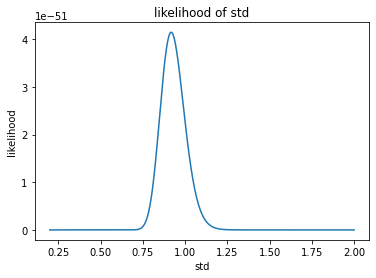

In [17]:
std_arr = np.linspace(0.2,2,1000)

likelihood_arr = []
for std in np.linspace(0.2,2,1000):
    p_arr = probability_of_mass_vector_under_N_vector(Ww,Wb,Wk,Nw,Nb,Nk,std,model_args[0],model_args[1])
    likelihood_arr.append(np.product(p_arr))

plt.plot(std_arr,likelihood_arr)
plt.title("likelihood of std")
plt.ylabel("likelihood")
plt.xlabel("std")

13671it [00:02, 6141.54it/s]


0.9165564292659392 1.16415 0.0107086875


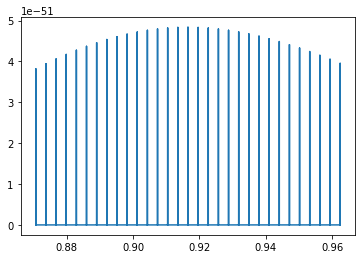

In [13]:
std_arr = []
a_arr = []
R_arr = []
iter = tqdm.tqdm(product(
     0.9165564292659392*np.linspace(0.95,1.05,31),
     1.16415*np.linspace(0.95,1.05,21),
     0.0107086875*np.linspace(0.95,1.05,21)
     ))
likelihood_arr = []
for std,a,R in iter:
    std_arr.append(std)
    a_arr.append(a)
    R_arr.append(R)
    p_arr = probability_of_mass_vector_under_N_vector(Ww,Wb,Wk,Nw,Nb,Nk,std,a,R)
    likelihood_arr.append(np.product(p_arr))

max_idx = np.argmax(likelihood_arr)
plt.plot(std_arr,likelihood_arr)
print(std_arr[max_idx],a_arr[max_idx],R_arr[max_idx])

Text(0, 0.5, 'percentage of points')

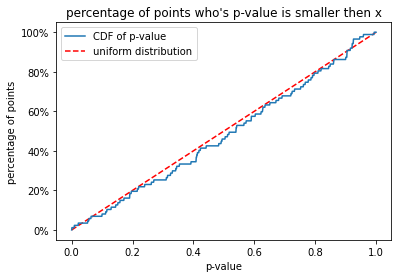

In [21]:
import matplotlib.ticker as mtick
p_vals = get_pvalue_of_point(Ww,Wb,Wk,Nw,Nb,Nk,0.9165564292659392 ,1.16415 ,0.0107086875).flatten()
p_arr = np.linspace(0,1,1000)
num = [np.mean(p_vals < p)*100 for p in p_arr]
plt.plot(p_arr,num,label="CDF of p-value")
plt.plot([0,1],[0,100],"--r",label="uniform distribution",zorder=0)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.legend()
plt.title("percentage of points who's p-value is smaller then x")
plt.xlabel("p-value")
plt.ylabel("percentage of points")

Quality Assurance

In [15]:
def get_distribution_of_masses_around_N_vector(num_points, Nw, Nb, Nk, std=0.9165564292659392, a=1.16415, R=0.0107086875):
    ret = np.zeros((0,3))
    while len(ret) < num_points:
        new_w_vector = np.random.uniform(0, 20, (10000, 3))
        p_arr = probability_of_mass_vector_under_N_vector(
            new_w_vector[:, 0], new_w_vector[:, 1], new_w_vector[:, 2], Nw, Nb, Nk, std, a, R)
        indexes = np.random.uniform(0, 1, p_arr.shape) < p_arr
        ret = np.concatenate([ret, new_w_vector[indexes,:]])
    return ret

100%|██████████| 20/20 [00:26<00:00,  1.31s/it]


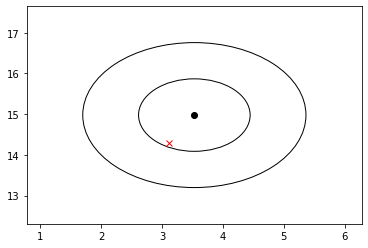

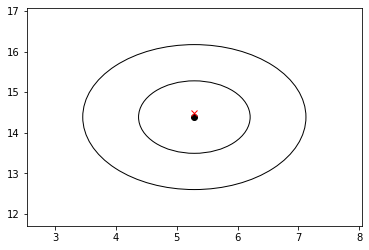

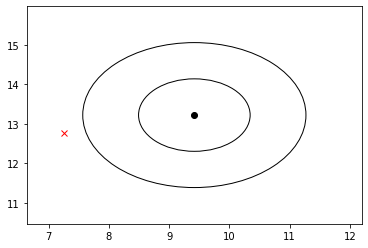

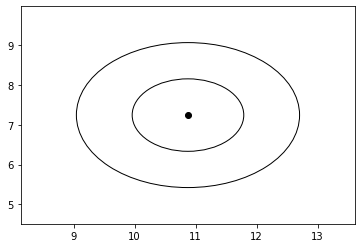

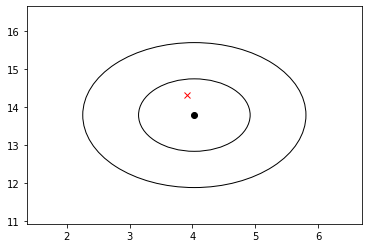

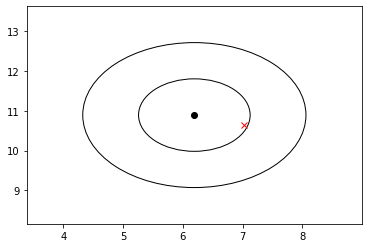

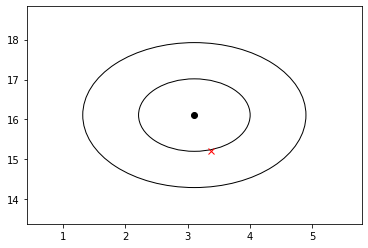

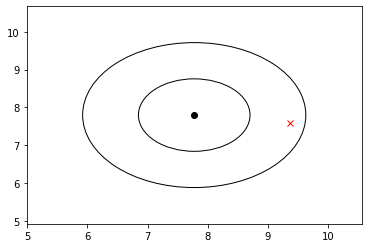

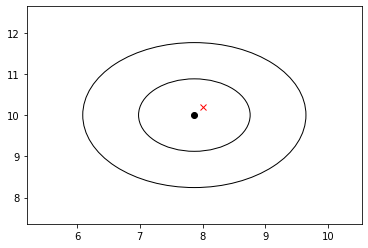

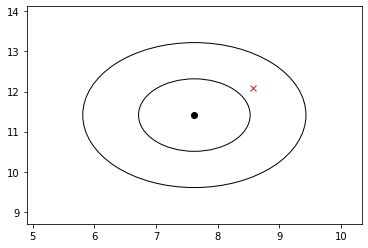

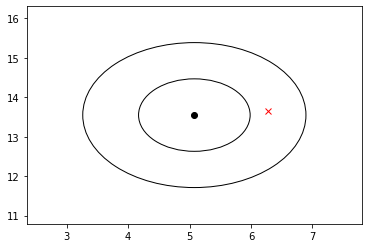

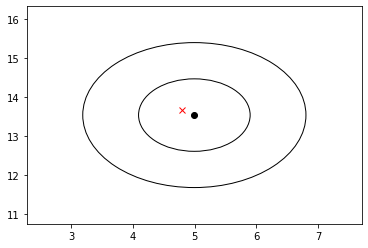

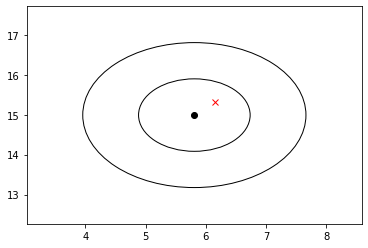

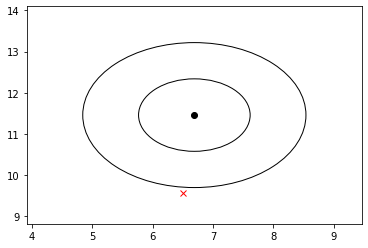

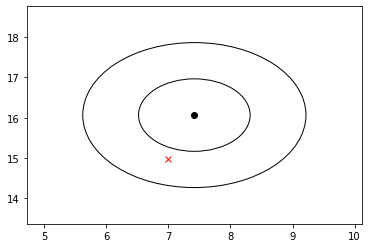

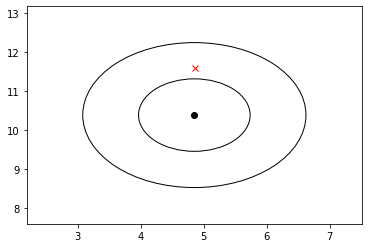

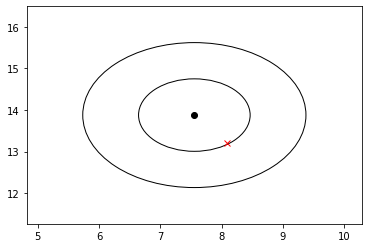

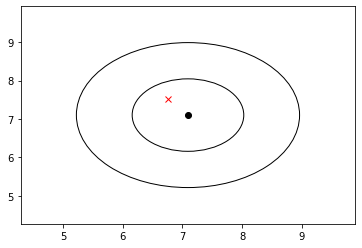

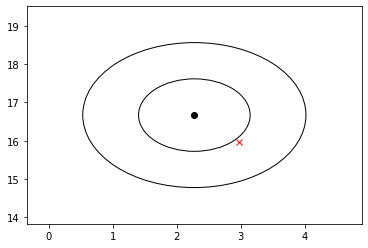

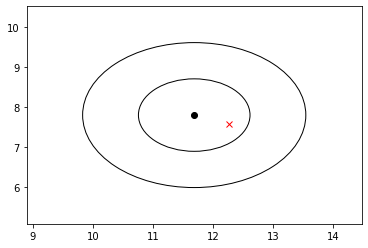

In [16]:
from matplotlib.patches import Ellipse

for i in tqdm.tqdm(range(20)):
    plt.figure()
    pW = get_distribution_of_masses_around_N_vector(1000,Nw[i],Nb[i],Nk[i])
    pW_mean = np.mean(pW[:,0]),np.mean(pW[:,1]),np.mean(pW[:,2])
    pW_std = np.std(pW[:,0]),np.std(pW[:,1]),np.std(pW[:,2])
    plt.gca().add_artist(Ellipse(pW_mean[:2],pW_std[0]*2,pW_std[1]*2,facecolor="none",edgecolor="k"))
    plt.gca().add_artist(Ellipse(pW_mean[:2],pW_std[0]*4,pW_std[1]*4,facecolor="none",edgecolor="k"))
    plt.plot(pW_mean[0],pW_mean[1],"ok")
    plt.xlim(pW_mean[0] - pW_std[0]*3,pW_mean[0] + pW_std[0]*3)
    plt.ylim(pW_mean[1] - pW_std[1]*3,pW_mean[1] + pW_std[1]*3)
    plt.plot(Ww[i],Wb[i],"xr")